<a href="https://colab.research.google.com/github/farhan-naqvi/thesparksfoundation/blob/main/Task-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Sparks Foundation : Data Science & Business Analytics Tasks

## Name : Syed Farhan Naqvi 

## Task - 2 : Prediction using Unsupervised ML

### Link to Dataset : https://bit.ly/3kXTdox

In [ ]:
# importing the required libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [ ]:
import warnings
warnings.filterwarnings('ignore') # used to suppress all the warnings

In [ ]:
# Loading the dataset 
df = pd.read_csv("Iris.csv")

In [ ]:
# Loading the columns of the Dataset
print("Columns :")
for i in range(len(df.columns)):
  print("\t",str(i+1)+".",df.columns[i])

Columns :
	 1. Id
	 2. SepalLengthCm
	 3. SepalWidthCm
	 4. PetalLengthCm
	 5. PetalWidthCm
	 6. Species


In [ ]:
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [ ]:
# Dropping the Id column
df = df.drop(['Id'],axis=1)

In [ ]:
# checking if there are any null values
df.isna().sum() 

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# printing some of the useful statistical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


# Visualizing the Data



## Univariate analysis

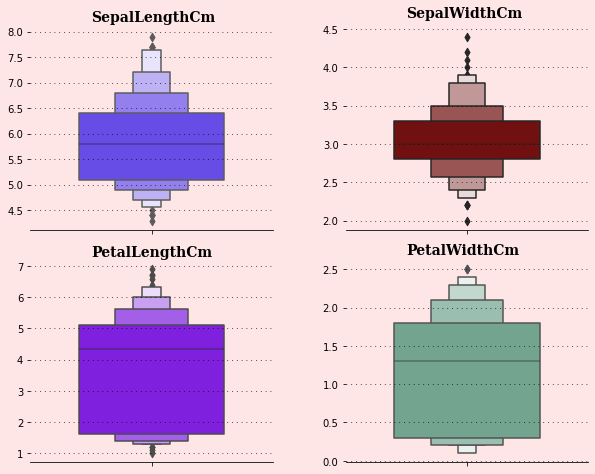

In [ ]:
fig = plt.figure(figsize=(10,8))
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.3,hspace=0.15)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])


background_color = "#ffe6e6"
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 


#SepalLengthCm
ax0.text(-0.25, 8.2, 'SepalLengthCm', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax0.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax0,y=df['SepalLengthCm'],palette=["#5833ff"],width=0.6)
ax0.set_xlabel("")
ax0.set_ylabel("")

#SepalWidthCm
ax1.text(-0.25, 4.65, 'SepalWidthCm', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=df['SepalWidthCm'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")


#PetalLengthCm
ax2.text(-0.25, 7.3, 'PetalLengthCm', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=df['PetalLengthCm'],palette=["#8000ff"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# PetalWidthCm
ax3.text(-0.25, 2.7, 'PetalWidthCm', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=df['PetalWidthCm'],palette=["#6aac90"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)

In [ ]:
# Target Variable
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

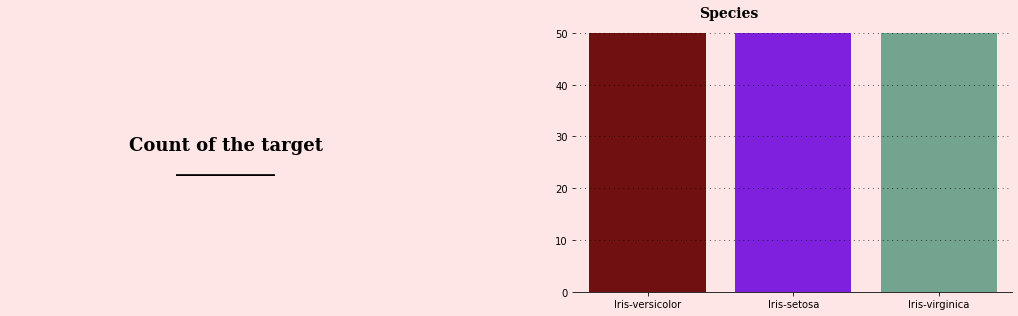

In [ ]:
# counting the number of targets
fig = plt.figure(figsize=(18,5))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

# Title of the plot
ax0.text(0.5,0.5,"Count of the target\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Target Count
ax1.text(0.35,53,"Species",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x = 'Species',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Iris-versicolor","Iris-setosa","Iris-virginica"])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)

ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

##Bivariate Analysis

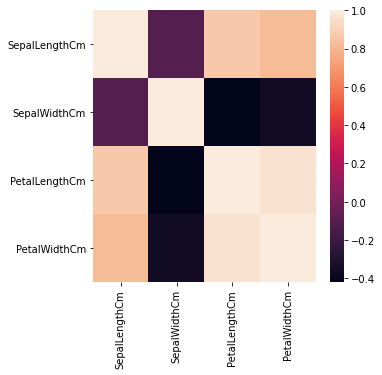

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr())
plt.show()

## Multivariate analysis


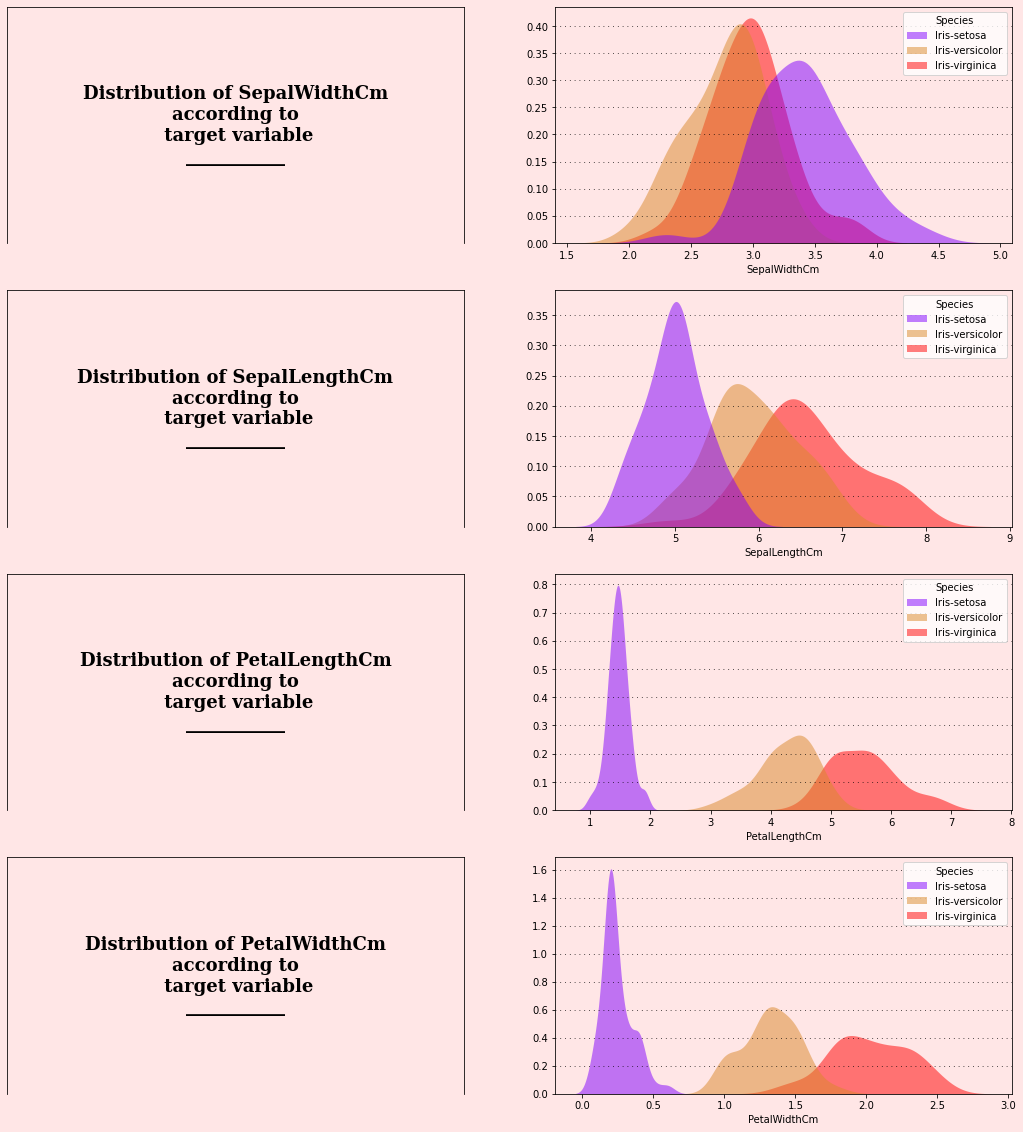

In [ ]:
fig = plt.figure(figsize=(18,20))
gs = fig.add_gridspec(4,2)
# gs.update(wspace=0.5, hspace=0.)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])

background_color = "#ffe6e6"
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 

color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]

ax0.text(0.5,0.5,"Distribution of SepalWidthCm\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='SepalWidthCm',hue="Species", fill=True,palette=["#8000ff","#da8829","#FF0000"], alpha=.5, linewidth=0)
ax1.set_xlabel("SepalWidthCm")
ax1.set_ylabel("")

ax2.text(0.5,0.5,"Distribution of SepalLengthCm\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='SepalLengthCm',hue="Species", fill=True,palette=["#8000ff","#da8829","#FF0000"], alpha=.5, linewidth=0)
ax3.set_xlabel("SepalLengthCm")
ax3.set_ylabel("")

ax4.text(0.5,0.5,"Distribution of PetalLengthCm\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df, x='PetalLengthCm',hue="Species", fill=True,palette=["#8000ff","#da8829","#FF0000"], alpha=.5, linewidth=0)
ax5.set_xlabel("PetalLengthCm")
ax5.set_ylabel("")

ax6.text(0.5,0.5,"Distribution of PetalWidthCm\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='PetalWidthCm',hue="Species", fill=True,palette=["#8000ff","#da8829","#FF0000"], alpha=.5, linewidth=0)
ax7.set_xlabel("PetalWidthCm")
ax7.set_ylabel("")

plt.show()

In [ ]:
# storing the independant features in X
X = df.iloc[:,:-1]

# storing the dependant features in X
y = df.iloc[:,-1]

print("Shape of the X :",X.shape)
print("Shape of the y :",y.shape)

Shape of the X : (150, 4)
Shape of the y : (150,)


In [ ]:
X = X.values.reshape(-1,4)
y = y.values.reshape(-1,1)

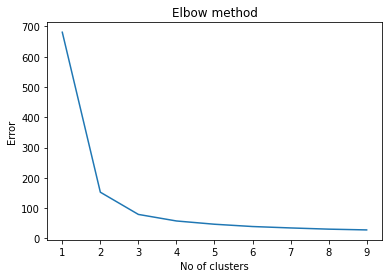

In [ ]:
Error =[]
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)
    
plt.plot(range(1, 10), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
# creating an instance of the KMeans class
kmeans = KMeans(n_clusters = 3)

# using the model to perform clustering on X
pred = kmeans.fit_predict(X)

print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


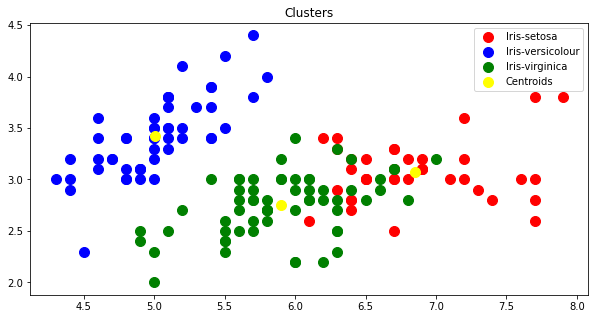

In [ ]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,5))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.title("Clusters")
plt.show()

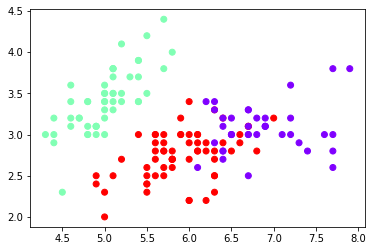

In [ ]:
plt.scatter(X[:,0],X[:,1],c = pred, cmap="rainbow",)
# plt.legend()
plt.show()